# Analysis notebook: `SU2020a_CRY_onspill-LH_au`  

## Define analysis name

In [1]:
ana_label = "SU2020a_CRY_onspill-LH_au"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020a_CRY_onspill-LH_au

analysis.csv	events.parquet	results.pkl
cut_flow.csv	hists.h5	SU2020a_CRY_onspill-LH_au.log
efficiency.csv	info.txt	SU2020a_CRY_onspill-LH_au.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020a_CRY_onspill-LH_au


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020a_CRY_onspill-LH_au/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020a_CRY_onspill-LH_au/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020a_CRY_onspill-LH_au/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020a_CRY_onspill-LH_au/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020a_CRY_onspill-LH_au/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020a_CRY_onspill-LH_au/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2189973,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2188059,99.913,99.913,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2098551,95.825,95.909,Electron track fits
3,is_downstream,Preselect,1272685,58.114,60.646,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,914920,41.778,71.889,One reco electron / event
5,is_truth_electron,Preselect,271686,12.406,29.695,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,116830,5.335,43.002,Track fit quality > 0.8
7,within_t0,Tracker,93908,4.288,80.380,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,93510,4.270,99.576,>20 active tracker hits
9,within_t0err,Tracker,87969,4.017,94.074,Track fit t0 uncertainty (t0err < 0.9 ns)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,k,N,Eff [%],Eff Err$-$ [%],Eff Err$+$ [%],Rate 1batch [$\text{day}^{-1}$],Rate 1batch Err$-$ [$\text{day}^{-1}$],Rate 1batch Err$+$ [$\text{day}^{-1}$],Rate 2batch [$\text{day}^{-1}$],Rate 2batch Err$-$ [$\text{day}^{-1}$],Rate 2batch Err$+$ [$\text{day}^{-1}$]
0,CE-like (wide),10779,41100000000,0.000,-0.000,0.000,28.079,-0.269,0.272,21.451,-0.205,0.207
1,CE-like (ext),1686,41100000000,0.000,-0.000,0.000,4.392,-0.106,0.109,3.355,-0.081,0.083
2,CE-like (sig),189,41100000000,0.000,-0.000,0.000,0.492,-0.036,0.038,0.376,-0.027,0.029
3,No veto (wide),4,10779,99.963,-0.024,0.014,0.010,-0.005,0.008,0.008,-0.004,0.006
4,No veto (ext),1,1686,99.941,-0.096,0.037,0.003,-0.002,0.006,0.002,-0.002,0.005
5,No veto (sig),0,189,100.000,-0.526,0.000,0.000,0.000,0.003,0.000,0.000,0.002


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_au/h1o_1x3_mom_windows.png


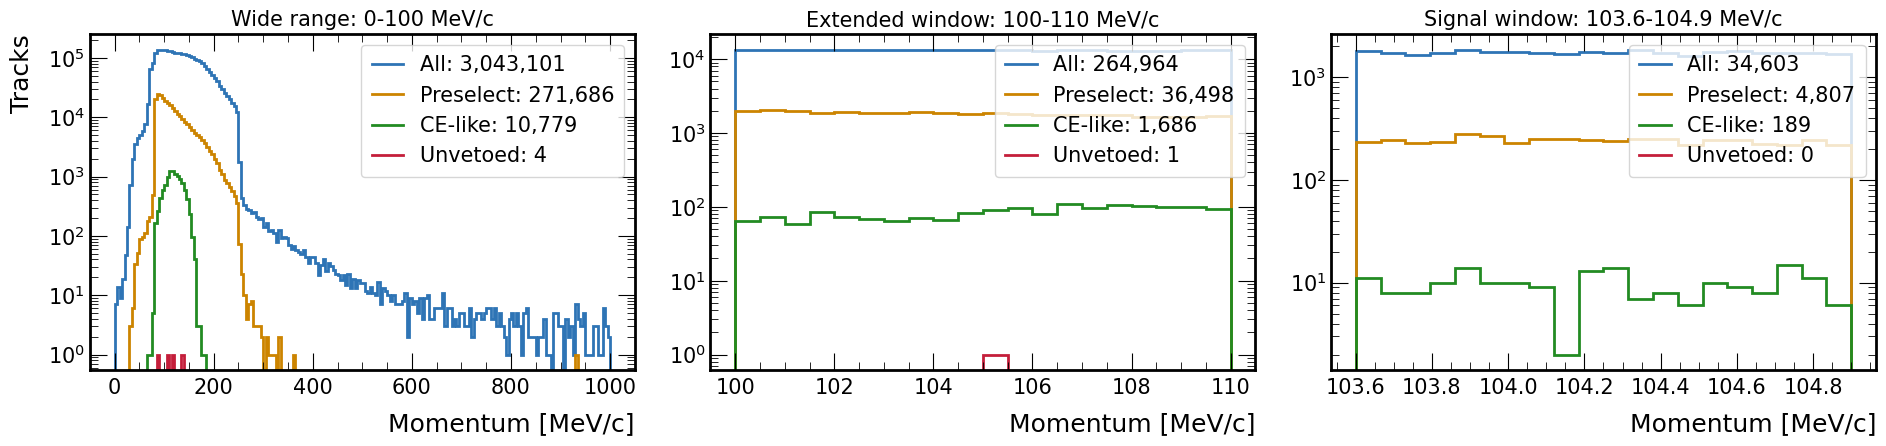

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_au/h1o_3x3_summary.png


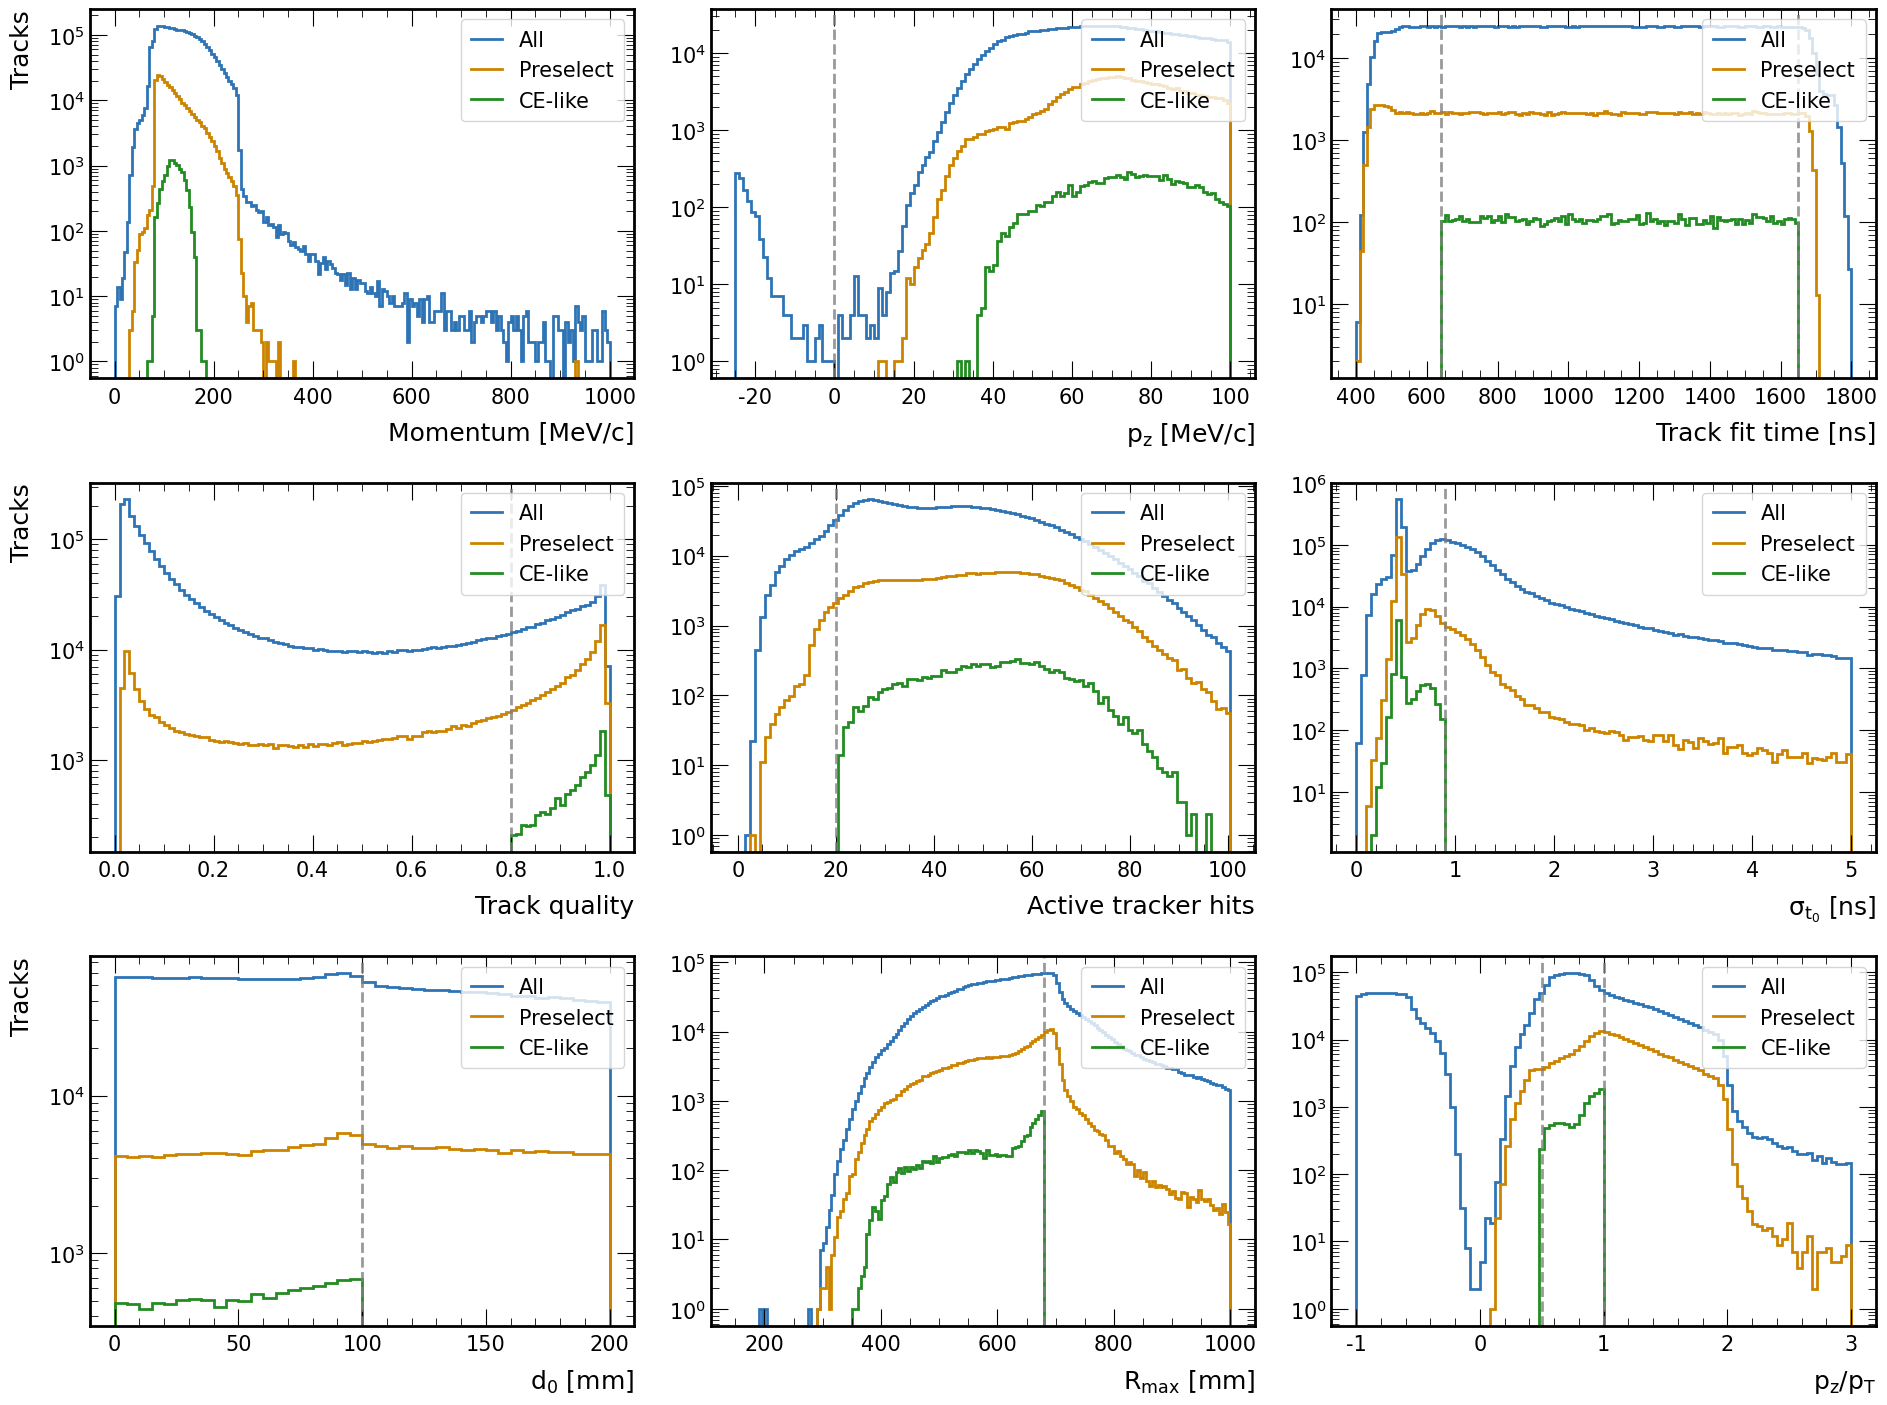

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_CRY_onspill-LH_au/h1o_crv_z.png


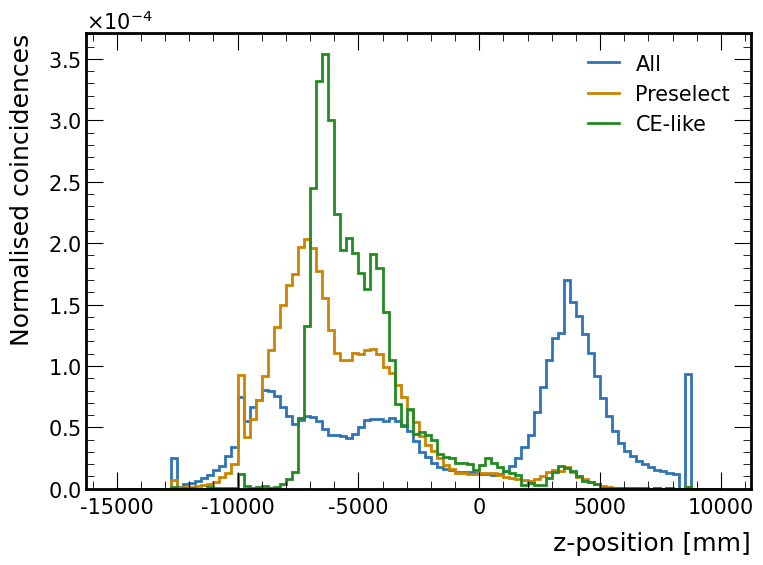

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [12]:
print(results["event_info"])

  Index:            23
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  1445.887901
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            43
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00000034.root
  Track time [ns]:  1004.101804
  Coinc time [ns]:  853.986267
  dt [ns]:          150.115536
----------------------------------------
  Index:            210
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00015581.root
  Track time [ns]:  822.773672
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            753
  Subrun:      

In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 4 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
at_trk_front: [[False, False, False, False, False, False, True, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
is_downstream: [True, False, True, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True, True, True]
good_trkqual: [True, False, False, False]
within_t0: [True, True, True, True]
has_hits: [True, True, True, False]
within_t0err: [True, False, True, False]
within_d0: [True, True, True, True]
pitch_angle: [[0.245, 0.552, 0.553, 0.554, 0.691, 0.898, 0.939, 0.962, 0.975], ..., [...]]
within_pitch_angle_lo: [True, False, True, False]
